# 청와대 청원 데이터 분석하기 

## 웹크롤링

In [26]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [27]:
titles = []
start_date = []
end_date = []
num_consent = []
answer_date = []
address = []

def get_info(url): 
    res = urlopen(url)
    soup = BeautifulSoup(res, "html.parser")
    
    # get titles, address(url)
    contents = soup.find_all('div', class_='ans_name_title')
    for n in range(0,len(contents)):
        content = contents[n]
        titles.append(content.a.get_text())
        add_url = str(content.find('a')['href'])
        address.append('https://www1.president.go.kr'+add_url)
    
    # 청원시작과 끝 날짜, 참여인원, 답변일 정보 얻기 
    infos = soup.find_all('ol', class_='ans_name_info')
    for info in infos: 
        start_date.append(info.find('p', class_='ans_list1_2').get_text()[2:-2])
        end_date.append(info.find('p', class_='ans_list2_2').get_text()[2:-2])
        num_consent.append(info.find('p', class_='ans_list3_2').get_text()[2:-2])
        answer_date.append(info.find('p', class_='ans_list4_2').get_text()[2:-2])          

In [28]:
for n in range(1,13): 
    url = 'https://www1.president.go.kr/petitions/answer?page=%d' % n
    get_info(url)

In [29]:
data = {'제목':titles, '청원시작일':start_date, '청원종료일': end_date,
       '참여인원': num_consent, '청원답변일':answer_date, 'URL':address}
df = pd.DataFrame(data)
df

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020. 04. 07,2020. 05. 07,"273,513",2020. 06. 05,https://www1.president.go.kr/petitions/587827
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020. 04. 02,2020. 05. 02,"1,007,040",2020. 06. 02,https://www1.president.go.kr/petitions/587624
2,세월호 전면재수사,2020. 04. 01,2020. 05. 01,"216,118",2020. 06. 01,https://www1.president.go.kr/petitions/587604
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,2020. 03. 27,2020. 04. 26,"207,563",2020. 05. 25,https://www1.president.go.kr/petitions/587334
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,2020. 03. 25,2020. 04. 24,"385,617",2020. 05. 25,https://www1.president.go.kr/petitions/587169
...,...,...,...,...,...,...
169,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원",2017. 11. 17,2017. 12. 17,"281,985",2018. 01. 16,https://www1.president.go.kr/petitions/45581
170,조두순 출소반대,2017. 09. 06,2017. 12. 05,"615,354",2017. 12. 06,https://www1.president.go.kr/petitions/10949
171,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,2017. 11. 04,2017. 12. 04,"216,774",2017. 12. 06,https://www1.president.go.kr/petitions/26024
172,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,2017. 09. 30,2017. 10. 30,"235,372",2017. 11. 26,https://www1.president.go.kr/petitions/18278


In [30]:
df.to_csv('BlueHouse Petition data.csv', sep=',', encoding='utf-8')

In [31]:
import pandas as pd

petition = pd.read_csv('BlueHouse Petition data.csv', thousands=',', encoding='utf-8', index_col=0)
petition.head()

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020. 04. 07,2020. 05. 07,273513,2020. 06. 05,https://www1.president.go.kr/petitions/587827
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020. 04. 02,2020. 05. 02,1007040,2020. 06. 02,https://www1.president.go.kr/petitions/587624
2,세월호 전면재수사,2020. 04. 01,2020. 05. 01,216118,2020. 06. 01,https://www1.president.go.kr/petitions/587604
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,2020. 03. 27,2020. 04. 26,207563,2020. 05. 25,https://www1.president.go.kr/petitions/587334
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,2020. 03. 25,2020. 04. 24,385617,2020. 05. 25,https://www1.president.go.kr/petitions/587169


In [32]:
len(petition)

174

In [33]:
import re 
import time
from tqdm import tqdm_notebook
from urllib.request import urlopen
from bs4 import BeautifulSoup

category =[]
content = []
answer = []

for n in tqdm_notebook(petition.index): 
    url = urlopen(petition['URL'][n]) 
    if n / 2 == 0:
        time.sleep(1)
    else: 
        time.sleep(2)
    soup = BeautifulSoup(url, "html.parser") 
    
    # get category 
    sector = soup.find('ul', class_='petitionsView_info_list')
    try: 
        category.append(sector.li.get_text()[4:])
    except AttributeError:
        print('AttributeError: index-', n, 'URL-', petition['URL'][n])
    
    # get petition content 
    content_raw = soup.find_all('div', class_='View_write')
    try: 
        if len(content_raw) > 1:
            content_raw_text = content_raw[1].get_text()
        else: 
            content_raw_text = content_raw[0].get_text()   
    except IndexError: 
        print('IndexError:', petition['URL'][n])
    
    content_split = re.split('\r|\t|\n|\xa0', content_raw_text)
    content.append(''.join(content_split))

    # get petition answer 
    answer_raw = soup.find_all('div', class_='pr_tk25')
    if len(answer_raw) > 1: 
        answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[1].get_text())
    else: 
        answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[0].get_text())
    answer_raw_text = ' '.join(answer_raw_text)
    answer.append(answer_raw_text[7:]) 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [34]:
print(len(category), len(content), len(answer))

174 174 174


In [35]:
petition['카테고리'] = category
petition['청원내용'] = content
petition['청원답변'] = answer

In [36]:
petition[petition['청원내용'] == '']

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변
144,합정 **** 불법 누드촬영,2018. 05. 17,2018. 06. 16,201590,2018. 05. 21,https://www1.president.go.kr/petitions/235102,인권/성평등,,
145,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2018. 03. 23,2018. 04. 22,209494,2018. 05. 21,https://www1.president.go.kr/petitions/173355,안전/환경,,
146,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,2018. 05. 11,2018. 06. 10,419006,2018. 05. 21,https://www1.president.go.kr/petitions/230552,인권/성평등,,
149,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,2018. 04. 17,2018. 05. 17,302082,2018. 05. 04,https://www1.president.go.kr/petitions/203181,행정,,


In [37]:
for n in [144, 145, 146, 149]: 
    url = urlopen(petition['URL'][n]) 
    soup = BeautifulSoup(url, "html.parser") 
    
    # get petition content 
    content_raw = soup.find_all('div', class_='View_write')
    content_raw_text = content_raw[2].get_text()   
    content_split = re.split('\r|\t|\n|\xa0', content_raw_text)
    petition['청원내용'][n] = ''.join(content_split)
    
    # get petition answer 
    answer_raw = soup.find_all('div', class_='pr_tk25')
    answer_raw_text = re.split("\r|\t|\n|\xa0", answer_raw[2].get_text())
    answer_raw_text = ' '.join(answer_raw_text)
    petition['청원답변'][n] = answer_raw_text[7:]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [38]:
petition[144:150]

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변
144,합정 **** 불법 누드촬영,2018. 05. 17,2018. 06. 16,201590,2018. 05. 21,https://www1.president.go.kr/petitions/235102,인권/성평등,한 유명 유튜버의 사례저는 성범죄 피해자입니다. 꼭 한번만 제 이야기를 들어주세요....,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...
145,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2018. 03. 23,2018. 04. 22,209494,2018. 05. 21,https://www1.president.go.kr/petitions/173355,안전/환경,2012년 전국의 몰카범죄는 2400건 2015년에 들어 3배 이상 증가해 무려 7...,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...
146,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,2018. 05. 11,2018. 06. 10,419006,2018. 05. 21,https://www1.president.go.kr/petitions/230552,인권/성평등,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.사건은 굉장히 빠르게 처리되...,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...
147,미세먼지의 위험 그리고 오염 및 중국에대한 항의,2018. 03. 24,2018. 04. 23,278128,2018. 05. 16,https://www1.president.go.kr/petitions/174292,안전/환경,미세먼지가 10년전에 비해 상당히 자주 몰려오고있습니다.언론에서도 중국발이라고 얘기...,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 ...
148,GMO완전표시제 시행을 촉구합니다!,2018. 03. 12,2018. 04. 11,216886,2018. 05. 08,https://www1.president.go.kr/petitions/164255,기타,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,<정혜승 뉴미디어 비서관> - 안녕하세요. 뉴미디어비서관 정혜승입니다. 오늘 1...
149,다산신도시 실버택배 비용은 입주민들의 관리비로 충당해야합니다.,2018. 04. 17,2018. 05. 17,302082,2018. 05. 04,https://www1.president.go.kr/petitions/203181,행정,다산신도시 입주민들이 택배원 대상으로 갑질을 저질러 사회적으로 큰 물의를 빚은 바 ...,<뉴미디어비서관> - 안녕하세요. 뉴미디어비서관 정혜승입니다. 오늘 11시 50분...


In [39]:
petition.to_csv('Final BlueHouse Petition data.csv', sep=',', encoding='utf-8')

### EDA

In [115]:
import pandas as pd
import platform
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [41]:
petition = pd.read_csv('Final BlueHouse Petition data.csv', 
                       index_col=0, parse_dates=['청원시작일','청원종료일','청원답변일'])
petition.head()

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020-04-07,2020-05-07,273513,2020-06-05,https://www1.president.go.kr/petitions/587827,문화/예술/체육/언론,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-04-02,2020-05-02,1007040,2020-06-02,https://www1.president.go.kr/petitions/587624,기타,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...
2,세월호 전면재수사,2020-04-01,2020-05-01,216118,2020-06-01,https://www1.president.go.kr/petitions/587604,기타,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,2020-03-27,2020-04-26,207563,2020-05-25,https://www1.president.go.kr/petitions/587334,행정,2주 자가격리를 어기고 제주도 4박5일 여행을 다녀온 강남구 **번 확진자와 같은 ...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,2020-03-25,2020-04-24,385617,2020-05-25,https://www1.president.go.kr/petitions/587169,기타,지금 우리나라뿐 아니라 모든 나라가 코로나19사태로 어려움을 겪고 있습니다.우리나라...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...


#### 청원 기간 확보하기

In [42]:
petition['20만 달성기간'] = (petition['청원종료일'] - petition['청원시작일']).dt.days
petition['청원 답변기간'] = (petition['청원답변일'] - petition['청원시작일']).dt.days
petition.head(3)         

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,20만 달성기간,청원 답변기간
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,2020-04-07,2020-05-07,273513,2020-06-05,https://www1.president.go.kr/petitions/587827,문화/예술/체육/언론,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...,30,59
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,2020-04-02,2020-05-02,1007040,2020-06-02,https://www1.president.go.kr/petitions/587624,기타,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,30,61
2,세월호 전면재수사,2020-04-01,2020-05-01,216118,2020-06-01,https://www1.president.go.kr/petitions/587604,기타,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...,30,61


#### 20만 달성 기간

In [43]:
petition['20만 달성기간'].unique()

array([30, 90, 60])

In [45]:
# 평균 20만 달성기간
petition['20만 달성기간'].mean()

30.517241379310345

30일 이전에 20만 달성한 청원들이 있으나, 청와대에서는 이를 30일 기준으로 청원종료일로 잡는 듯하다.

#### 청와대 답변 기간

In [52]:
petition['청원 답변기간'].unique()

array([ 59,  61,  60,  56,  54,  58, 102,  51,  57,  76,  80,   6,   4,
        14,  37,  65,  81,  91,  90, 114,  84,  50,  53,  45,  49,  27,
        30,  43,  39,  48,  25,  19,   2, 153,  10,  28,  24,  44,  46,
       107,  55,  52,  31,  42,  23,  41,  17,  36,  47,  29,  40,  15,
        62,  32,  22])

In [58]:
petition['청원 답변기간'].mean()

50.793103448275865

평균적으로 청원답변까지 걸리는 시간이 대략 50일이라고 할 수 있다. 

![법이 만들어지는 과정](법과정.jpg)

90일 이내에 청원에 대한 답변을 들을 수 있다는 것은 기존의 제도권 정치 내에서 시민의 목소리가 정치권 제도 내로 들어가 법이 만드는데 걸리는 시간과 과정을 비교해보면 훨씬 더 단기 간 내에 청와대(가장 높은 곳)로부터 답변을 들을 수 있다는 점에서 효과적인 직접 민주주의 형태라 할 수 있다. 더불어 법안 내로 들어간다고 하더라도 많은 안건이 계류중이라는 것을 고려할 때에 국민이 가장 빠른 경로로 청와대로부터 답변을 들을 수 있는 중요한 통로라고 할 수 있다. 

In [57]:
# 답변 기간 일주일 이내 
petition[(petition['청원 답변기간'] == 2) | (petition['청원 답변기간'] == 4) | (petition['청원 답변기간'] == 6)]

,제목,청원시작일,청원종료일,참여인원,청원답변일,URL,카테고리,청원내용,청원답변,20만 달성기간,청원 답변기간
26,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,2020-03-18,2020-04-17,2715626,2020-03-24,https://www1.president.go.kr/petitions/586819,안전/환경,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,30,6
27,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,2020-03-20,2020-04-19,2026252,2020-03-24,https://www1.president.go.kr/petitions/586880,안전/환경,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,30,4
28,"가해자 n번방박사,n번방회원 모두 처벌해주세요",2020-03-20,2020-04-19,650579,2020-03-24,https://www1.president.go.kr/petitions/586885,안전/환경,n번방 박사라는 악마같은 인간은아동·청소년을 포함한 수십 명의 여성을 협박·강요해 ...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,30,4
29,N번방 대화 참여자들도 명단을 공개하고 처벌해주십시오,2020-03-20,2020-04-19,457487,2020-03-24,https://www1.president.go.kr/petitions/586879,인권/성평등,이번에 N번방 운영자가 검거되었습니다. 미성년자 소녀들을 대상으로 극악무도한 성범죄...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,30,4
85,안녕하세요. 증인 윤지오입니다.,2019-03-30,2019-04-29,318057,2019-04-01,https://www1.president.go.kr/petitions/578761,인권/성평등,안녕하세요. 증인 윤지오입니다.우선 고인의 이름으로 불리우는 사건 자체가 피해자가 ...,윤지오씨 신변보호 관련 청원에 원경환 서울지방경찰청장이 답변합니다. 지난 18일 청...,30,2
87,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다.,2019-03-12,2019-04-11,738566,2019-03-18,https://www1.president.go.kr/petitions/559071,기타,故장자연씨의 수사 기간 연장 및 재수사를 청원합니다. 수사 기간을 연장해 장자연씨가...,"故 장자연씨 사건 증인 신변보호 청원과 관련, 청원인은 사회적 불이익, 또는 신변에...",30,6
144,합정 **** 불법 누드촬영,2018-05-17,2018-06-16,201590,2018-05-21,https://www1.president.go.kr/petitions/235102,인권/성평등,한 유명 유튜버의 사례저는 성범죄 피해자입니다. 꼭 한번만 제 이야기를 들어주세요....,<정혜승 뉴미디어 비서관> 안녕하십니까. 뉴미디어비서관 정혜승입니다. 오늘 11...,30,4


일주일 이내로 받은 답변의 경우에는 대부분 인권/성평등과 관련된 영역이다.

**이 사건들은 왜 답변기간이 빨랐을까?**

In [59]:
columns = ['제목','카테고리','청원 답변기간','참여인원','청원내용','청원답변','URL']
petition = petition[columns]
petition.head()

,제목,카테고리,청원 답변기간,참여인원,청원내용,청원답변,URL
0,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,문화/예술/체육/언론,59,273513,최근 MBC의 잇따른 보도에 따르면 종편 채널A 기자가 현직 검사장과의 친분을 내세...,안녕하십니까. 방송통신위원회 위원장 한상혁입니다. 오늘 답변드릴 ‘채널A와 TV조선...,https://www1.president.go.kr/petitions/587827
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,기타,61,1007040,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,https://www1.president.go.kr/petitions/587624
2,세월호 전면재수사,기타,61,216118,저는 세월호 희생자 단원고 2학년 6반 순범이 큰 누나 입니다.6주기가 3주도 안남...,안녕하십니까. 시민참여비서관 이기헌입니다. 「세월호 참사 전면 재수사」국민청원에...,https://www1.president.go.kr/petitions/587604
3,자가격리를 어기고 제주도 4박5일 여행.미국유학생 강남구 **번 확진자 처벌해주세요,행정,59,207563,2주 자가격리를 어기고 제주도 4박5일 여행을 다녀온 강남구 **번 확진자와 같은 ...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...,https://www1.president.go.kr/petitions/587334
4,수출용 코로나19 진단키트 이름을 독도로 해주세요,기타,61,385617,지금 우리나라뿐 아니라 모든 나라가 코로나19사태로 어려움을 겪고 있습니다.우리나라...,안녕하십니까. 사회정책비서관 정동일입니다. 오늘은 <수출용 진단키트 독도 명칭 ...,https://www1.president.go.kr/petitions/587169


In [60]:
petition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 7 columns):
제목         174 non-null object
카테고리       174 non-null object
청원 답변기간    174 non-null int64
참여인원       174 non-null int64
청원내용       174 non-null object
청원답변       171 non-null object
URL        174 non-null object
dtypes: int64(2), object(5)
memory usage: 10.9+ KB


#### TOP 10 청원

In [65]:
petition.sort_values(by='참여인원', ascending=False).head(10)

,제목,카테고리,청원 답변기간,참여인원,청원내용,청원답변,URL
26,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,안전/환경,6,2715626,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,https://www1.president.go.kr/petitions/586819
27,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,안전/환경,4,2026252,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,https://www1.president.go.kr/petitions/586880
73,자유 한국당 정당해산 청원,정치개혁,50,1831900,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,안녕하십니까. 청와대 정무수석 강기정입니다. 오늘은 청와대 국민청원 답변을 위해...,https://www1.president.go.kr/petitions/579682
21,문재인 대통령님을 응원 합니다!,기타,58,1504597,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,https://www1.president.go.kr/petitions/585683
20,문재인 대통령 탄핵을 촉구합니다.,정치개혁,80,1469023,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,https://www1.president.go.kr/petitions/584936
24,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",인권/성평등,59,1449521,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",안녕하십니까. 사회정책비서관 정동일입니다. ｢신천지 강제 해산 청원｣ 및 「신천...,https://www1.president.go.kr/petitions/585290
116,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,안전/환경,55,1192049,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터 센터장 정혜승 입니다. 오...,https://www1.president.go.kr/petitions/408609
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,기타,61,1007040,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,https://www1.president.go.kr/petitions/587624
31,중국인 입국 금지 요청,보건복지,57,761833,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,안녕하세요. 디지털소통센터장 강정수입니다. 오늘은 ‘중국인 입국금지’ 청원에 대해...,https://www1.president.go.kr/petitions/584593
56,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!,정치개혁,50,757730,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반...,안녕하세요. 청와대 디지털소통센터장 강정수입니다. 오늘은 ‘조국 법무부장관 후보자...,https://www1.president.go.kr/petitions/582190


In [66]:
# 20만 이하인데도 청와대 답변함 - 같이 묶어서 답해줌 
petition[petition['참여인원'] < 200000]

,제목,카테고리,청원 답변기간,참여인원,청원내용,청원답변,URL
102,국회의원 연봉인상을 반대합니다.,정치개혁,31,81590,현재 우리나라의 의원 연은 1인당 GDP 대비 5배 수준으로 OECD국가들 중에서...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터장 정혜승입니다. 새해 첫 ...,https://www1.president.go.kr/petitions/462618
113,포항 약국 칼부림 사건의 가해 남성을 제대로 처벌하라.,인권/성평등,23,142715,지난 6월 정신지체장애 남성(46세 정**)이 약국에 들어와 무고한 약사와 직원을 ...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터 센터장 정혜승 입니다. 오...,https://www1.president.go.kr/petitions/445550


#### 카테고리별 시각화

In [67]:
petition['카테고리'].value_counts()

인권/성평등         46
정치개혁           24
기타             23
안전/환경          22
문화/예술/체육/언론    15
육아/교육          10
반려동물            8
보건복지            6
교통/건축/국토        5
외교/통일/국방        5
행정              3
경제민주화           2
성장동력            2
미래              2
일자리             1
Name: 카테고리, dtype: int64

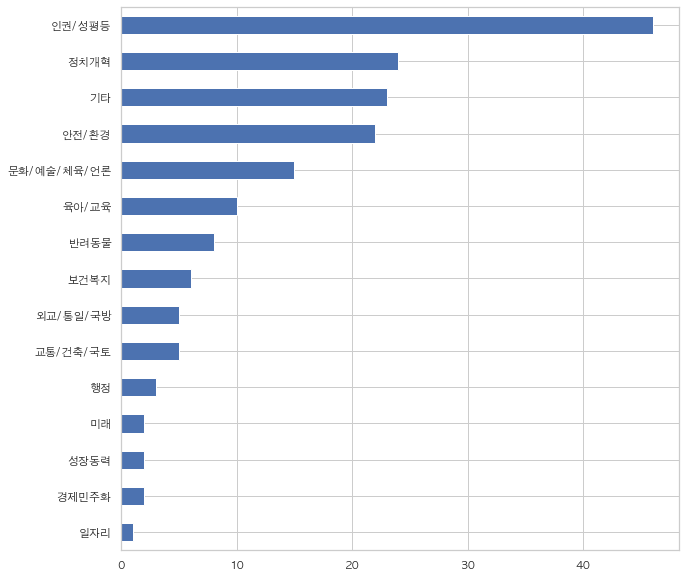

In [116]:
petition['카테고리'].value_counts().sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

가장 국민의 목소리가 높은 영역이 '인권/성평등' 영역이라 할 수 있다. 두번째 순위인 정치개혁보다 대략 2배 정도의 청원수를 보이고 있으며, 그 다음으로는 '정치개혁', '기타', '안전/환경' 순으로 청원 수가 높다는 것을 확인할 수 있다. 

#### 참여인원 순 정렬 

In [69]:
petition.sort_values(by='참여인원', ascending=False).head(10)

,제목,카테고리,청원 답변기간,참여인원,청원내용,청원답변,URL
26,텔레그램 n번방 용의자 신상공개 및 포토라인 세워주세요,안전/환경,6,2715626,오늘 검거되었다고 합니다타인의 수치심과 어린 학생들을지옥으로 몰아넣은 가해자를포토라...,▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,https://www1.president.go.kr/petitions/586819
27,텔레그램 n번방 가입자 전원의 신상공개를 원합니다,안전/환경,4,2026252,"안녕하세요,텔레그램 n번방에 대한 수사가 진행되고 일부의 용의자가 검거되어 다행입니...",▲민갑룡 경찰청장:안녕하십니까. 경찰청장 민갑룡입니다. 텔레그램 n번방과 관련된 ...,https://www1.president.go.kr/petitions/586880
73,자유 한국당 정당해산 청원,정치개혁,50,1831900,민주당과 정부에 간곡히 청원합니다 자유한국당은 국민의 막대한 세비를 받는 국회의원으...,안녕하십니까. 청와대 정무수석 강기정입니다. 오늘은 청와대 국민청원 답변을 위해...,https://www1.president.go.kr/petitions/579682
21,문재인 대통령님을 응원 합니다!,기타,58,1504597,코로나 바이러스19로 인해 대한민국 모든 국민이 힘든 시기에 있습니다. 하지만 국민...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,https://www1.president.go.kr/petitions/585683
20,문재인 대통령 탄핵을 촉구합니다.,정치개혁,80,1469023,국민의 한 사람으로서 문재인 대통령의 탄핵을 촉구합니다. 이번 우한 폐렴(신종 코로...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 코로나19 대처와 관련해 <...,https://www1.president.go.kr/petitions/584936
24,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.",인권/성평등,59,1449521,"신천지 예수교 증거장막성전(이하, 신천지)의 강제 해체(해산)을 청원합니다.“MBC...",안녕하십니까. 사회정책비서관 정동일입니다. ｢신천지 강제 해산 청원｣ 및 「신천...,https://www1.president.go.kr/petitions/585290
116,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,안전/환경,55,1192049,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다. ...,<정혜승 디지털소통센터장> 안녕하세요. 디지털소통센터 센터장 정혜승 입니다. 오...,https://www1.president.go.kr/petitions/408609
1,렌트카 훔쳐 사망사고를 낸 10대 엄중 처벌해주세요,기타,61,1007040,29일 오전 0시 1분쯤 대전 동구의 한 네거리에서 훔친 렌터카를 몰던 10대 청소...,안녕하십니까. 디지털소통센터장 강정수입니다. 오늘은 「렌트카 훔쳐 사망사고 낸 ...,https://www1.president.go.kr/petitions/587624
31,중국인 입국 금지 요청,보건복지,57,761833,중국발 코로나 바이러스가 확산되고 있습니다.북한 마저도 중국인 입국을 금지하는데 춘...,안녕하세요. 디지털소통센터장 강정수입니다. 오늘은 ‘중국인 입국금지’ 청원에 대해...,https://www1.president.go.kr/petitions/584593
56,청와대는 조국 법무부장관 후보자의 임명을 반드시 해주십시오!!,정치개혁,50,757730,조국은 국민이 지킵니다 !! 청와대는 조국 법무부 장관 후보자의 임명을 반...,안녕하세요. 청와대 디지털소통센터장 강정수입니다. 오늘은 ‘조국 법무부장관 후보자...,https://www1.president.go.kr/petitions/582190


평균만 따지면 안되는게 청원수가 적으면 당연히 참여인원은 더 높게 나올 수 있음.

In [184]:
petition_cate = petition.groupby('카테고리')['참여인원','청원 답변기간'].agg({'참여인원':'sum','청원 답변기간':'mean'})
petition_cate['청원수'] = petition['카테고리'].value_counts()
petition_cate['청원수 대비 참여인원'] = petition_cate['참여인원'] / petition_cate['청원수']

In [187]:
petition_cate.sort_values('참여인원', ascending=False)

,참여인원,청원 답변기간,청원수,청원수 대비 참여인원
카테고리,,,,
인권/성평등,13547006,47.347826,46,294500.130435
안전/환경,11327073,47.181818,22,514866.954545
정치개혁,9871168,52.458333,24,411298.666667
기타,8844755,51.217391,23,384554.565217
문화/예술/체육/언론,3945615,52.133333,15,263041.000000
육아/교육,2878548,62.700000,10,287854.800000
보건복지,2218061,51.166667,6,369676.833333
외교/통일/국방,1810542,46.800000,5,362108.400000
반려동물,1714853,48.500000,8,214356.625000


In [ ]:
plt.figure(figsize=(12,10))
plt.xticks(rotation = 45 )
order = petition_cate.sort_values('청원수 대비 참여인원', ascending=False).index
ax = sns.barplot("카테고리", y="참여인원", data=petition, order=order, palette="coolwarm")

In [189]:
petition_cate.sort_values('청원 답변기간', ascending=True)

,참여인원,청원 답변기간,청원수,청원수 대비 참여인원
카테고리,,,,
행정,736959,42.333333,3,245653.000000
외교/통일/국방,1810542,46.800000,5,362108.400000
안전/환경,11327073,47.181818,22,514866.954545
인권/성평등,13547006,47.347826,46,294500.130435
반려동물,1714853,48.500000,8,214356.625000
성장동력,483849,50.500000,2,241924.500000
보건복지,2218061,51.166667,6,369676.833333
기타,8844755,51.217391,23,384554.565217
문화/예술/체육/언론,3945615,52.133333,15,263041.000000


In [195]:
petition_cate.sort_values('청원수 대비 참여인원', ascending=False)

,참여인원,청원 답변기간,청원수,청원수 대비 참여인원
카테고리,,,,
안전/환경,11327073,47.181818,22,514866.954545
미래,855883,75.000000,2,427941.500000
정치개혁,9871168,52.458333,24,411298.666667
기타,8844755,51.217391,23,384554.565217
일자리,383039,61.000000,1,383039.000000
보건복지,2218061,51.166667,6,369676.833333
외교/통일/국방,1810542,46.800000,5,362108.400000
인권/성평등,13547006,47.347826,46,294500.130435
육아/교육,2878548,62.700000,10,287854.800000


In [111]:
# seaborn 한글 글씨체 해결
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fm.get_fontconfig_fonts()
font_location = '/Library/Fonts/NanumBarunGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

Matplotlib is building the font cache using fc-list. This may take a moment.


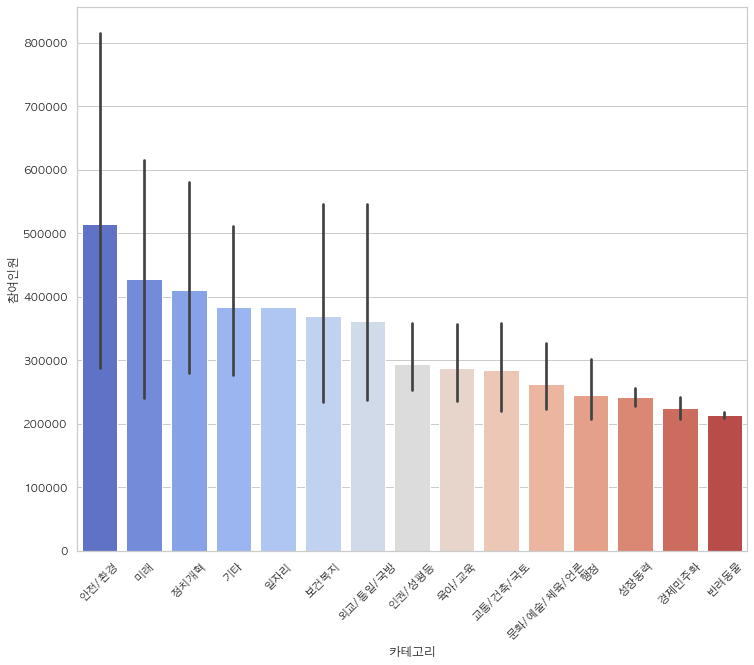

In [197]:
plt.figure(figsize=(12,10))
plt.xticks(rotation = 45 )
order = petition_cate.sort_values('청원수 대비 참여인원', ascending=False).index
ax = sns.barplot("카테고리", y="참여인원", data=petition, order=order, palette="coolwarm")